<a href="https://colab.research.google.com/github/HKang42/DS-Unit-1-Build/blob/master/COVID_19_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load dataset and do some initial exploration

In [0]:
#code for loading files from online

import pandas as pd

url_confrimed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'

confirmed = pd.read_csv(url_confrimed, sep = ',', engine='python')
recov = pd.read_csv(url_recovered, sep = ',', engine='python')
death = pd.read_csv(url_death, sep = ',', engine='python')

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,418
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91


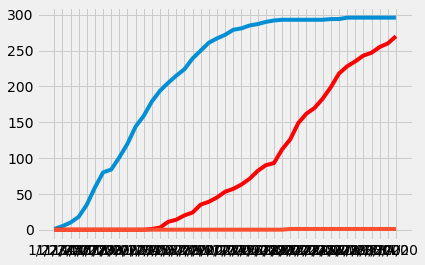

In [32]:
# make a basic plot to see how a single row of data looks

# pick which row (i.e. which province/state) to look at
province = 3

plt.plot(confirmed.columns[4:], confirmed.iloc[province][confirmed.columns[4:]])

plt.plot(recov.columns[4:], recov.iloc[province][recov.columns[4:]], color = 'r')

plt.plot(death.columns[4:], death.iloc[province][death.columns[4:]])

plt.show()

In [33]:
# let's see how many countries we have

confirmed['Country/Region'].value_counts()

US                 35
Mainland China     31
Australia           8
Canada              4
Chile               1
                   ..
Ukraine             1
North Macedonia     1
Faroe Islands       1
Sweden              1
Spain               1
Name: Country/Region, Length: 86, dtype: int64

# Write some functions to get totals for our data sets

- One function to get totals for a specific region and data frame (confirmed, recovered, deceased)
- Another function that uses the above function to get daily totals for every single country for a specific dataframe (confirmed, recovered, deceased.


In [0]:
import numpy as np
import pandas as pd

# Create function to get daily totals for any region
# input is the desired data frame (confirmed cases, recoveries, or deaths) and desired region. Optional input is to cut out the year for date times.
# output is a series with the same features as the input dataframe and each date's value is the daily total. Sub-region data is filled with NaN values.

def region_total(df, region, cut_year = True):

  # create a series to store our totals for each day
  # use columns of the input dataframe to create the index for our series
  total = pd.Series( index = df.columns)

  # create condition to filter dataframe down to only the desired region
  condition = df['Country/Region'] == region

  filtered = df[condition]

  # loop through each date in the input df. Calculate each daily total. Assign total to the corresponding date in the total series
  for col in df:

    if col[-1].isdigit() == True:
      total[col] = filtered[col].sum()
    
    else:
      total[col] = np.NaN
      pass

  # assign the country/region column to the proper region
  total['Country/Region'] = region

  # cut out the year if cut_year == True (which is the default)
  if cut_year == True:
    col_list = list( death.columns )

    for i in range(len(col_list)):
      if col_list[i][-1].isdigit() == True:
        col_list[i] = col_list[i][:-3]

    total.index = col_list

  else:
    pass

  return total

In [0]:
# let's create a dataframe containing the daily totals for each country (on other words, we're combining all of the Province/State rows)

# write a function that takes any of the dataframes, and gets the daily totals for each Country
def country_totaler(df):
  # create a list of every country
  countries = df['Country/Region'].value_counts().index

  # create an empty data frame with the same columns as the input dataframes
  country_totals = pd.DataFrame( columns = df.columns)

  for country in countries:
    
    c_total = region_total(df , country , cut_year=False)

    country_totals = country_totals.append(c_total , ignore_index= True)

  return country_totals

In [0]:
# get numbers for Mainland China

region = 'Mainland China'
china_confirm = region_total(confirmed, region)

china_recov = region_total(recov, region)

china_dead = region_total(death, region)

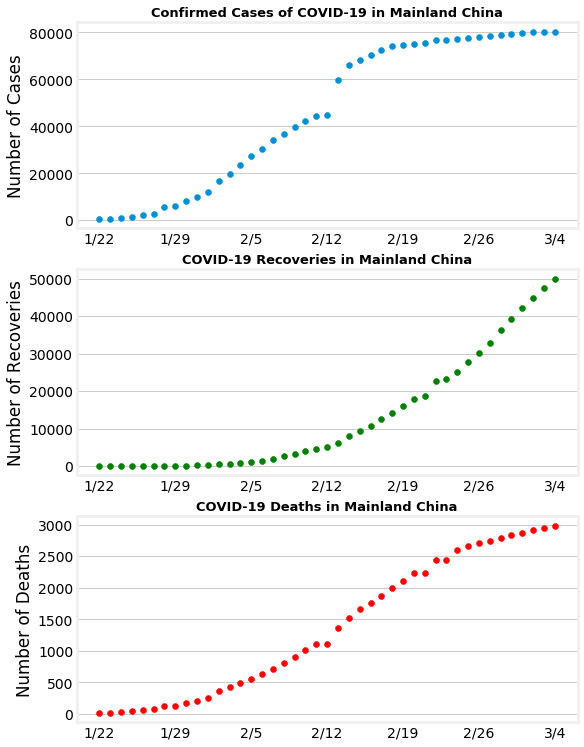

In [37]:
# plot data for Mainland China

# create figure
fig = plt.figure( figsize=[8,12] )

# choose style
plt.style.use('fivethirtyeight')

# generate plot for confirmed cases
ax1 = fig.add_subplot(3,1,1)
ax1.scatter(china_confirm.index[4:], china_confirm[4:])
ax1.set_title('Confirmed Cases of COVID-19 in Mainland China', fontweight = 'bold', fontsize = 13)
ax1.set_ylabel('Number of Cases')

# show ticks only every seven days
ticklist = ax1.xaxis.get_ticklabels()
ticklist = list(set(ticklist) - set(ticklist[::7]))
for label in ticklist:
    label.set_visible(False)

# generate plot for Recovered Cases
ax2 = fig.add_subplot(3,1,2)
ax2.scatter(china_recov.index[4:], china_recov[4:], color = 'g')
ax2.set_title('COVID-19 Recoveries in Mainland China', fontweight = 'bold', fontsize = 13)
ax2.set_ylabel('Number of Recoveries')

ticklist = ax2.xaxis.get_ticklabels()
ticklist = list(set(ticklist) - set(ticklist[::7]))
for label in ticklist:
    label.set_visible(False)

# generate plot for number of deaths
ax3 = fig.add_subplot(3,1,3)
ax3.scatter(china_dead.index[4:], china_dead[4:], color = 'r')
ax3.set_title('COVID-19 Deaths in Mainland China', fontweight = 'bold', fontsize = 13)
ax3.set_ylabel('Number of Deaths')

ticklist = ax3.xaxis.get_ticklabels()
ticklist = list(set(ticklist) - set(ticklist[::7]))
for label in ticklist:
    label.set_visible(False)

# set background color
ax1.set_facecolor( color='None')
ax2.set_facecolor( color='None')
ax3.set_facecolor( color='None')
fig.set_facecolor( color='None')

# show only x-axis grid lines
ax1.grid( axis = 'x')
ax2.grid( axis = 'x' )
ax3.grid( axis = 'x' )

plt.show()

In [38]:
for tick in ax1.xaxis.get_ticklabels():
  print(tick)

Text(0, 0, '1/22')
Text(7, 0, '1/29')
Text(14, 0, '2/5')
Text(21, 0, '2/12')
Text(28, 0, '2/19')
Text(35, 0, '2/26')
Text(42, 0, '3/4')


# Create a Geo Scatter Plot to visualize the spread of COVID-19

In [39]:
# plot each individual observation using latitude and longitude
# size of bubble corresponds to the cumulative totale for that row (i.e. value of the most recent date)

import plotly.graph_objects as go
import plotly.express as px

df = confirmed

most_recent = confirmed.columns[-1]

title_info = {'text': "Geographic Distribution of Confirmed Cases of COVID-19", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top', 'font.size' : 20}

fig = px.scatter_geo(df.loc[:, ['Lat', 'Long', most_recent]  ], lat= 'Lat', lon = 'Long', projection="natural earth", size = most_recent, size_max=40, title=title_info, color_discrete_sequence = ['red'])

fig.show()

# Let's try a slightly different geo scatter plot

The above chart that plots each individual row makes it look like only a handful of countries have any confirmed cases of the COVID-19. 

Let's try grouping observations by country/region and then plotting.

In [40]:
# Create dataframe containing the total number of confirmed cases for each country.

confirm_totals = country_totaler(confirmed)

confirm_totals.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20
0,NaN,US,NaN,NaN,1.0,1.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,7.0,8.0,8.0,11.0,11.0,12.0,12.0,12.0,12.0,12.0,12.0,13.0,13.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,35.0,35.0,35.0,53.0,53.0,59.0,60.0,62.0,70.0,76.0,101.0,122.0,153.0
1,NaN,Mainland China,NaN,NaN,547.0,639.0,916.0,1399.0,2062.0,2863.0,5494.0,6070.0,8124.0,9783.0,11871.0,16607.0,19693.0,23680.0,27409.0,30553.0,34075.0,36778.0,39790.0,42306.0,44327.0,44699.0,59832.0,66292.0,68347.0,70446.0,72364.0,74139.0,74546.0,74999.0,75472.0,76922.0,76938.0,77152.0,77660.0,78065.0,78498.0,78824.0,79251.0,79826.0,80026.0,80151.0,80271.0
2,NaN,Australia,NaN,NaN,0.0,0.0,0.0,0.0,4.0,5.0,5.0,6.0,9.0,9.0,12.0,12.0,12.0,13.0,13.0,14.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,19.0,22.0,22.0,22.0,22.0,22.0,23.0,23.0,25.0,27.0,30.0,39.0,52.0
3,NaN,Canada,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,8.0,9.0,9.0,9.0,10.0,11.0,11.0,13.0,14.0,20.0,24.0,27.0,30.0,33.0
4,NaN,Chile,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [0]:
# Let's drop the Province/State, Latitude, and Longitude columns

confirm_totals = confirm_totals.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [42]:
import plotly.graph_objects as go
import plotly.express as px

# Pick the dataframe we want to use. Should be an output from the country_totaler function.
df = confirm_totals

# Get the most recent date in the dataframe
most_recent = df.columns[-1]

# Create Figure
fig = go.Figure()

# Create title information
title_info = {'text': "Geographic Distribution of Confirmed Cases of COVID-19", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top', 'font.size' : 20}

# Add title
fig.update_layout(title = title_info)

# set the background color for countries with at least 1 case
country_color = 'rgb(133, 133, 133)'

# Add a Choropleth to color in all countries with at least 1 case. Set range of colors such that all countries are filled equally.
fig.add_trace( go.Choropleth(  locationmode='country names', locations= df['Country/Region'], z = df[most_recent] , colorscale= [[0,country_color], [1,country_color] ], showscale=False , hoverinfo='skip'))

# Create the scattergeo bubbles.  Use https://plot.ly/python/reference/#scattergeo for documentation. 
# Define the marker here instead of inside the function so it's easier to modify
marker = dict(  size = df[most_recent], line_color='rgb(200,200,200)', line_width=0.5, sizemode = 'area', sizeref = 24, sizemin = 1, opacity = 0.9, color='rgb(230, 57, 57)')

# Add the Geo Scatter plot
fig.add_trace ( go.Scattergeo( marker = marker, locationmode='country names', locations=df['Country/Region'],\
                              hovertemplate = ('%{marker.size:,}'), hoverinfo = 'text', textposition='bottom center', name='Confirmed Cases' ) )

#fig.update_layout(annotations = [dict( x=0.81,y=0.64, text = 'hi', showarrow = True, arrowhead = 7 )])

fig.show()

I think this plot is an improvement over the first one. At the very least, it's easier to see the spread of COVID-19 outside of asia.

Side note: we slightly cheated by setting a minimum size for each dot. But I think it's worth it for a better visualization. Additionally, it's better to do it on this plot than the first one (the latitude and longitude plot) because country totals won't have their bubble sizes modified as much as individual rows.

Now let's see how recoveries and deaths look.  We should expect to see a similar bubble distribution as in the confirmed cases plot.

In [68]:
# create the recovery totals for all countries

recov_totals = country_totaler(recov)

# Pick the dataframe we want to use. Should be an output from the country_totaler function.
df = recov_totals

# Get the most recent date in the dataframe
most_recent = df.columns[-1]

# Create Figure
fig = go.Figure()

# Create title information
title_info = {'text': "Geographic Distribution of Recoveries from COVID-19", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top', 'font.size' : 20}

# Add title
fig.update_layout(title = title_info)

# set the background color for countries with at least 1 case
country_color = 'rgb(133, 133, 133)'

# Add a Choropleth to color in all countries with at least 1 case. Set range of colors such that all countries are filled equally.
fig.add_trace( go.Choropleth(  locationmode='country names', locations= df['Country/Region'], z = df[most_recent] , colorscale= [[0,country_color], [1,country_color] ], showscale=False , hoverinfo='skip'))

# Create the scattergeo bubbles.  Use https://plot.ly/python/reference/#scattergeo for documentation. 
# Define the marker here instead of inside the function so it's easier to modify
marker = dict(  size = df[most_recent], line_color='rgb(200,200,200)', line_width=0.5, sizemode = 'area', sizeref = 24, sizemin = 1, opacity = 0.9, color='rgb(51, 153, 51)')

# Add the Geo Scatter plot
fig.add_trace ( go.Scattergeo( marker = marker, locationmode='country names', locations=df['Country/Region'],\
                              hovertemplate = ('%{marker.size:,}'), hoverinfo = 'text', textposition='bottom center', name='Recoveries' ) )

#fig.update_layout(annotations = [dict( x=0.81,y=0.64, text = 'hi', showarrow = True, arrowhead = 7 )])

fig.show()

In [79]:
# create the death totals for all countries

death_totals = country_totaler(death)

# Pick the dataframe we want to use. Should be an output from the country_totaler function.
df = death_totals

# Get the most recent date in the dataframe
most_recent = df.columns[-1]

# Create Figure
fig = go.Figure()

# Create title information
title_info = {'text': "Geographic Distribution of Deaths due to COVID-19", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top', 'font.size' : 20}

# Add title
fig.update_layout(title = title_info)

# set the background color for countries with at least 1 case
country_color = 'rgb(133, 133, 133)'

# Add a Choropleth to color in all countries with at least 1 case. Set range of colors such that all countries are filled equally.
fig.add_trace( go.Choropleth(  locationmode='country names', locations= df['Country/Region'], z = df[most_recent] , colorscale= [[0,country_color], [1,country_color] ], showscale=False , hoverinfo='skip'))

# Create the scattergeo bubbles.  Use https://plot.ly/python/reference/#scattergeo for documentation. 
# Define the marker here instead of inside the function so it's easier to modify
marker = dict(  size = df[most_recent], line_color='rgb(200,200,200)', line_width=0.5, sizemode = 'area', sizeref = 8, sizemin = 1, opacity = 0.9, color='rgb(255, 0, 102)')

# Add the Geo Scatter plot
fig.add_trace ( go.Scattergeo( marker = marker, locationmode='country names', locations=df['Country/Region'],\
                              hovertemplate = ('%{marker.size:,}'), hoverinfo = 'text', textposition='bottom center', name='deaths' ) )

#fig.update_layout(annotations = [dict( x=0.81,y=0.64, text = 'hi', showarrow = True, arrowhead = 7 )])

fig.show()

Note that the bubble scaling (sizeref) had to be changed to improve visibility for the deaths plot.

Without changing the bubble scaling or minimum bubble size, it was almost impossible to see any bubbles aside from Mainland China.



In [0]:
?fig.layout.annotations

In [46]:
# Check for inconsistencies in dataframes (decrease in cases between days)

df = confirmed

date_list = df.columns[4:]

c = 0

for i in range(0, len (date_list) - 1 ):
  condition = df[ date_list[ i + 1 ] ] < df[ date_list[i] ] 

  if df[condition].shape[0] != 0:
    #print('\nDate:', date_list[i])
    print(df[condition].loc[ :, ['Province/State', 'Country/Region', date_list[i] , date_list[i+1 ]] ] , '\n')

    c += 1

print( '\n\nNumber of decreases in cumulative totals:',c)

   Province/State Country/Region  1/22/20  1/23/20
32            NaN          Japan        2        1 

   Province/State Country/Region  1/30/20  1/31/20
50     Queensland      Australia        3        2 

   Province/State Country/Region  2/1/20  2/2/20
50     Queensland      Australia       3       2 

   Province/State Country/Region  2/6/20  2/7/20
32            NaN          Japan      45      25 

                          Province/State Country/Region  2/23/20  2/24/20
75     Omaha, NE (From Diamond Princess)             US       11        0
76    Travis, CA (From Diamond Princess)             US        5        0
78  Lackland, TX (From Diamond Princess)             US        2        0 

           Province/State Country/Region  2/28/20  2/29/20
77  From Diamond Princess      Australia        8        0 



Number of decreases in cumulative totals: 6


Based on the above code, both the confirmed data set and the recov data set have some inconsistencies. 

Perhaps the methods for obtaining the data were faulty. Were some sources mis-counted? Were some diagnoses or recoveries reversed?  Can patients relapse?

The numbers are small enough that it should be inconsequential for the big picture. But it's something to think about. 

In [47]:
# Checking the Diamond Princess rows

df = confirmed

#condition = (df['Province/State'].str.contains('diamond', na = False))

#df[condition]

df [ df['Province/State'].str.contains('Diamond', na = False)]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20
70,Diamond Princess cruise ship,Others,35.4437,139.6380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,61,64,135,135,175,175,218,285,355,454,542,621,634,634,634,691,691,691,705,705,705,705,705,705,706,706
75,"Omaha, NE (From Diamond Princess)",US,41.2545,-95.9758,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,11,11,0,0,0,0,0,0,0,0,0,0
76,"Travis, CA (From Diamond Princess)",US,38.2721,-121.9399,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,0,0,0,0,0,0,0,0,0,0
77,From Diamond Princess,Australia,35.4437,139.6380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,7,7,7,7,7,8,8,0,0,0,0,0
78,"Lackland, TX (From Diamond Princess)",US,29.3829,-98.6134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0
83,Unassigned Location (From Diamond Princess),US,35.4437,139.6380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,36,42,42,44,44,44,45,45,45




---


&nbsp;


# **old code below**

&nbsp;

---



In [0]:
# choose which country and which dataframe to use
country = 'Mainland China'
which_df = confirmed

condition = confirmed['Country/Region'] == country

In [0]:
china = which_df[condition]

In [0]:
total_dict = pd.DataFrame( columns=china.columns )
#total_dict.columns = china.columns

for col in china:
  

  if col[-1].isdigit() == False:
    total_dict[col] = china[col]

  elif col[-1].isdigit() == True:
    #print(col, '\t', china[col].sum())

    total_dict[col] = china[col].sum()

  else:
    
    pass

total_dict = total_dict.drop( total_dict.index[-1:0:-1])
total_dict = total_dict.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [51]:
total_dict

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20
0,Mainland China,547,639,916,1399,2062,2863,5494,6070,8124,9783,11871,16607,19693,23680,27409,30553,34075,36778,39790,42306,44327,44699,59832,66292,68347,70446,72364,74139,74546,74999,75472,76922,76938,77152,77660,78065,78498,78824,79251,79826,80026,80151,80271


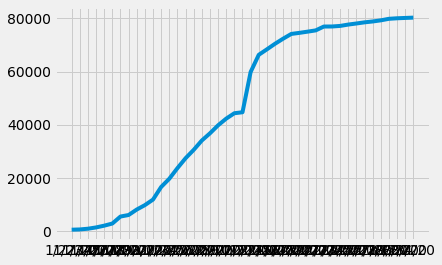

In [52]:
# graph of total deaths on each day for all of china (NOT CUMULATIVE)

total_dict.shape

plt.plot(total_dict.columns[1:], total_dict.iloc[0][total_dict.columns[1:]])

In [53]:
condition = confirmed['Country/Region'] == 'Mainland China'

confirmed[condition]['1/22/20'].sum()

547

In [54]:
t = pd.Series( index= death.columns)
t

Province/State   NaN
Country/Region   NaN
Lat              NaN
Long             NaN
1/22/20          NaN
1/23/20          NaN
1/24/20          NaN
1/25/20          NaN
1/26/20          NaN
1/27/20          NaN
1/28/20          NaN
1/29/20          NaN
1/30/20          NaN
1/31/20          NaN
2/1/20           NaN
2/2/20           NaN
2/3/20           NaN
2/4/20           NaN
2/5/20           NaN
2/6/20           NaN
2/7/20           NaN
2/8/20           NaN
2/9/20           NaN
2/10/20          NaN
2/11/20          NaN
2/12/20          NaN
2/13/20          NaN
2/14/20          NaN
2/15/20          NaN
2/16/20          NaN
2/17/20          NaN
2/18/20          NaN
2/19/20          NaN
2/20/20          NaN
2/21/20          NaN
2/22/20          NaN
2/23/20          NaN
2/24/20          NaN
2/25/20          NaN
2/26/20          NaN
2/27/20          NaN
2/28/20          NaN
2/29/20          NaN
3/1/20           NaN
3/2/20           NaN
3/3/20           NaN
3/4/20           NaN
dtype: float6

In [55]:
# Geo Scatter plot using express plotly (px.scatter_geo)
df = country_totaler(confirmed)

most_recent = df.columns[-1]

title_info = {'text': "Geographic Distribution of Confirmed Cases of COVID-19", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top', 'font.size' : 20}
projection_type = 'equirectangular'

fig = go.Figure( px.scatter_geo(df.loc[:, ['Country/Region', most_recent]  ], locationmode='country names', locations='Country/Region', \
                     projection = projection_type, size = most_recent, size_max=60, title=title_info, color_discrete_sequence = ['red'] ) )

fig.add_trace( go.Choropleth(  locationmode='country names', locations= df['Country/Region'], z = df[most_recent] , colorscale= [[0,country_color], [1,country_color] ], showscale=False , hoverinfo='skip') )

fig.show()

In [56]:
# more experimenting with plotly

fig = go.Figure(px.scatter_geo(df.loc[:, ['Country/Region', most_recent]  ], locationmode='country names', locations='Country/Region', \
                     projection = projection_type, size = most_recent, size_max=60, title=title_info, color_discrete_sequence = ['red']) )

#fig.add_trace( go.Figure(go.Scattergeo( resolution=50, showcountries=True, countrycolor="Black"  ))

#fig.update_geos( resolution=50, showcountries=True, countrycolor="Black" )

#fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})

#fig.add_trace( px.scatter_geo(df.loc[:, ['Country/Region', most_recent]  ], locationmode='country names', locations='Country/Region', \
#                     projection = projection_type, size = most_recent, size_max=60, title=title_info, color_discrete_sequence = ['red']) )

fig.add_trace( go.Choropleth(  locationmode='country names', locations= df['Country/Region'], z = df[most_recent] , colorscale= [[0,country_color], [1,country_color] ], showscale=False ) )

fig.show()